# FLIGHT FARE PREDICTION

### The price of an Airline Ticket is affected by a number of factors, such as flight duration, days left for departure, arrival time and departure time etc. Airline organizations may diminish the cost at the time they need to build the market and at the time when the tickets are less accessible. They may maximize the costs. The price may rely upon different factors. Each factor has its own proprietary rules and algorithms to set the price accordingly. Recent advances in Artificial Intelligence (AI) and Machine Learning (ML) makes it possible to infer such rules and model the price variation.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
import warnings
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pickle
from sklearn.pipeline import Pipeline
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv('Clean_Dataset.csv')

In [5]:
data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [7]:
data.describe() # We use .T (tranpose -switching the data to one side or the other)

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [8]:
data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [9]:
data.value_counts('flight')

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
G8-107        1
6E-2914       1
SG-9923       1
6E-3211       1
G8-405        1
Name: count, Length: 1561, dtype: int64

In [10]:
data = data.drop(['Unnamed: 0','flight'], axis =1)

In [11]:
data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [12]:
profile = ProfileReport(data,title='Ydata_profiling_analysis',explorative =False)

In [13]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
data.value_counts('airline')

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [15]:
data.shape

(300153, 10)

In [16]:
data.price.unique()

array([ 5953,  5956,  5955, ..., 87051, 74731, 77105], dtype=int64)

## EXPLORATIVE DATA ANALYSIS
- UNIVARIATE ANALYSIS
- BIAVARIATE ANALYSIS
- MULTIVARIATE ANALYSIS

# UNIVARIATE ANALYSIS

## To check if our data is balanced 

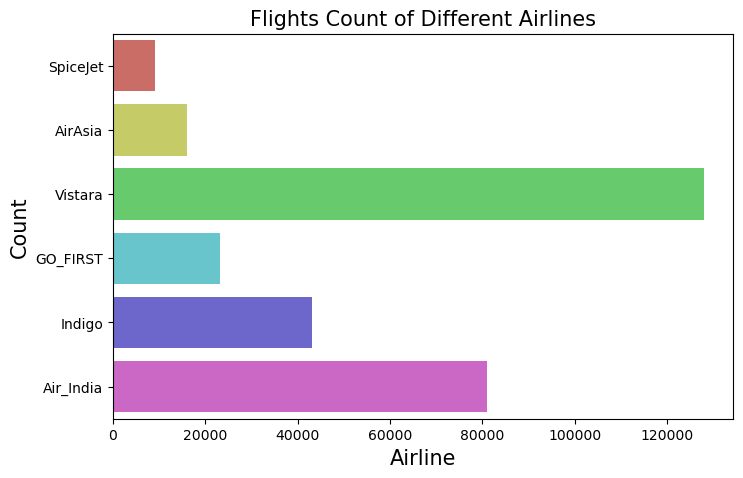

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(data['airline'],palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

## To check for data distribution

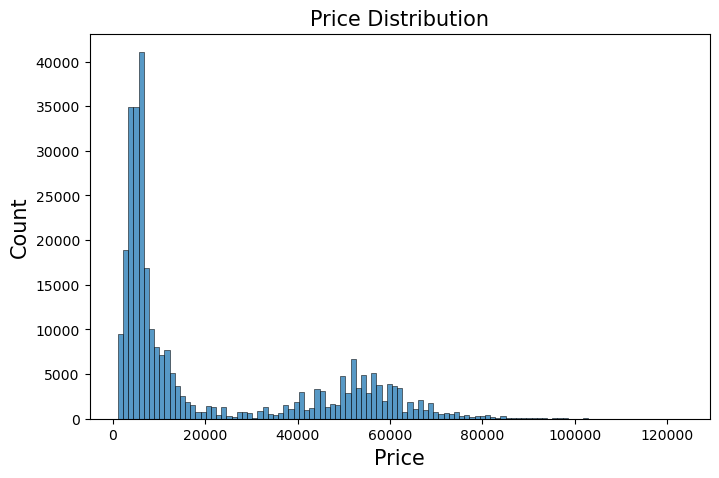

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(data['price'],palette='hls')
plt.title('Price Distribution',fontsize=15)
plt.xlabel('Price',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

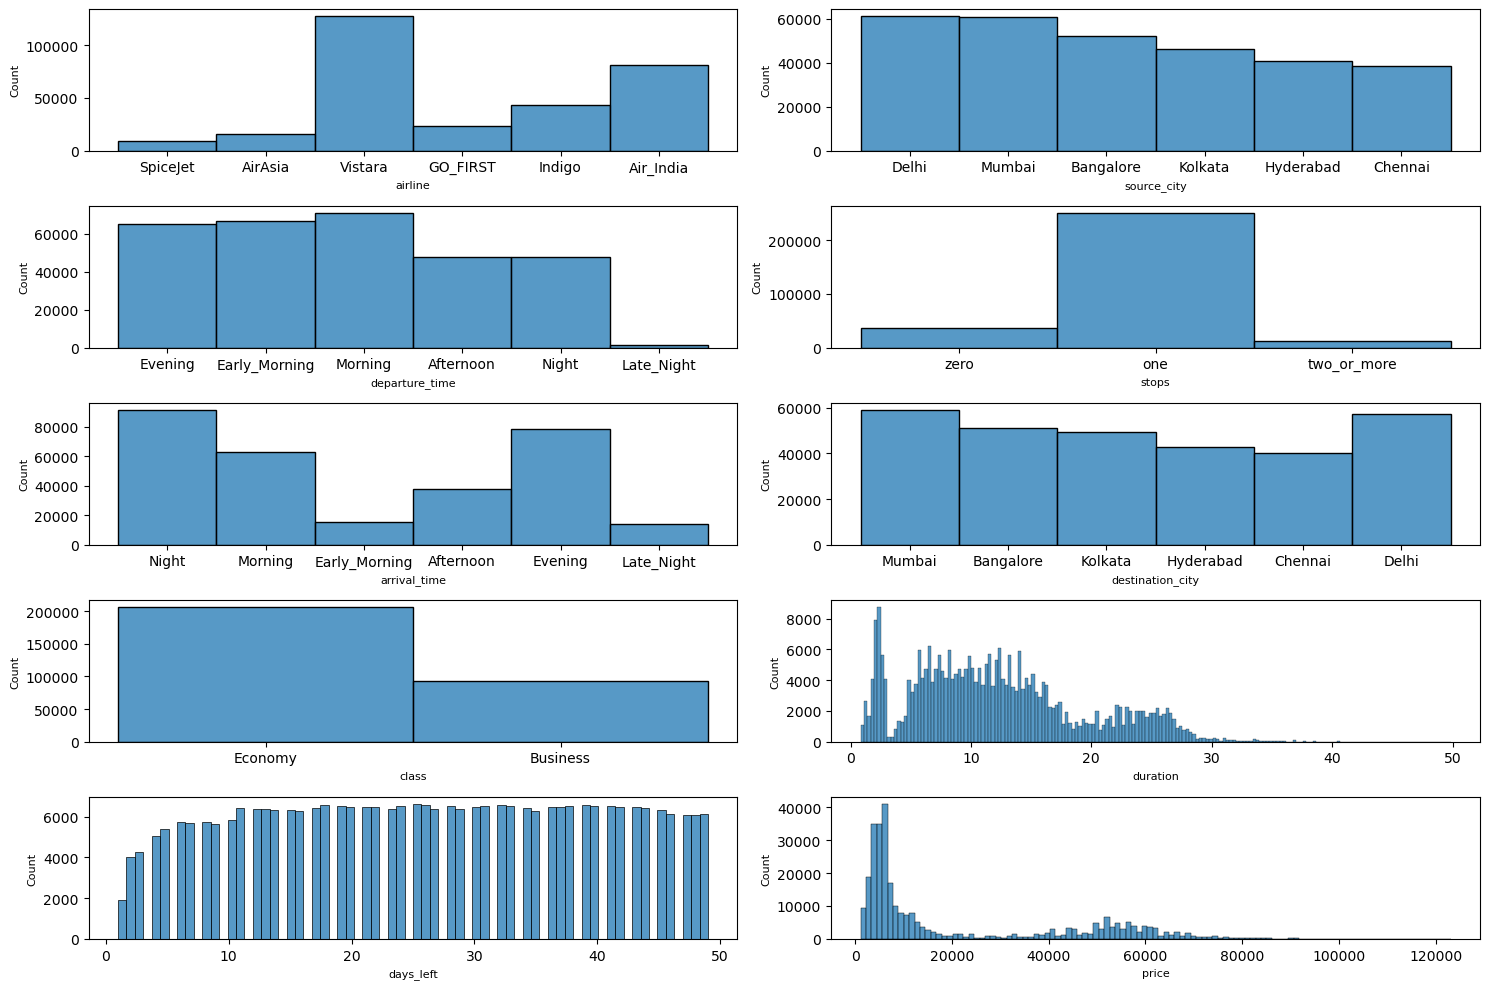

In [23]:
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.histplot(x=data[column])
        plt.xlabel(column,fontsize=8)
        plt.ylabel('Count',fontsize=8)
    plotnumber+=1
plt.tight_layout()

## Check for Outliers in the Price

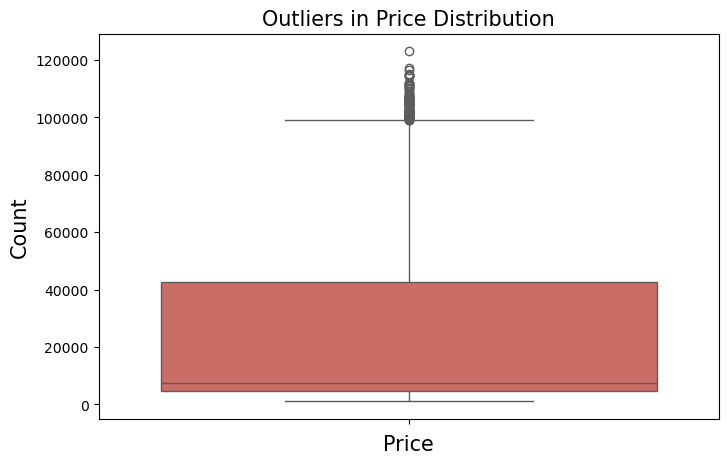

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(data['price'],palette='hls')
plt.title('Outliers in Price Distribution',fontsize=15)
plt.xlabel('Price',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

# BIVARIATE ANALYSIS

## ANALYSE  PRICE VARIATIONS AMONG DIFFERENT AIRLINES

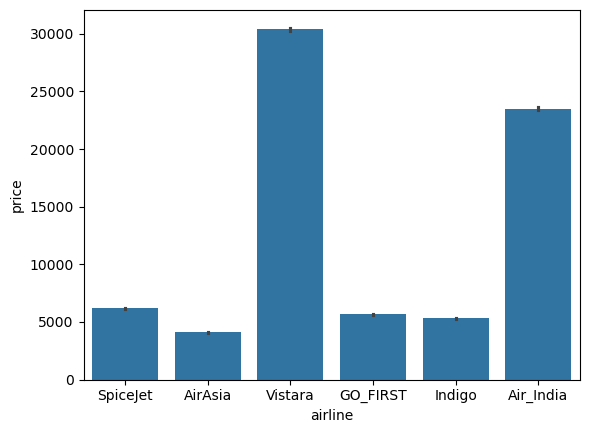

<Figure size 1500x1000 with 0 Axes>

In [28]:
sns.barplot(x='airline',y='price', data=data)
plt.figure(figsize = (15,10))
plt.show()

## Vistara Airline has the highest price followed by Air_India

## ANALYSIS OF  PRICE VARIATION FROM SOURCE CITY

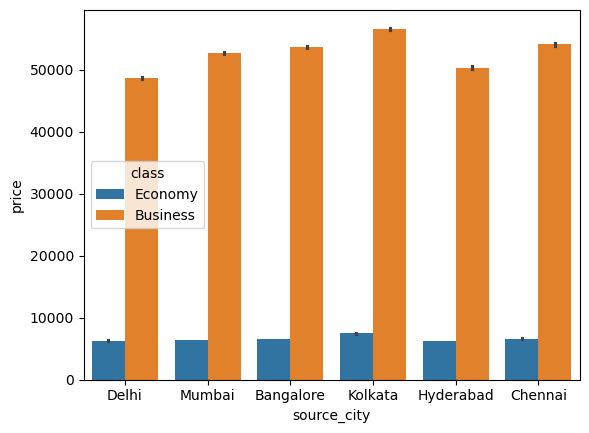

<Figure size 1500x1000 with 0 Axes>

In [31]:
sns.barplot(x='source_city',y='price', data=data, hue='class')
plt.figure(figsize = (15,10))
plt.show()

## Kolkata have the highest Business class ticket at souce_city followed by Mumbai and Banglore

## ANALYSIS OF PRICE IMPACT TO DESTINATION CITY

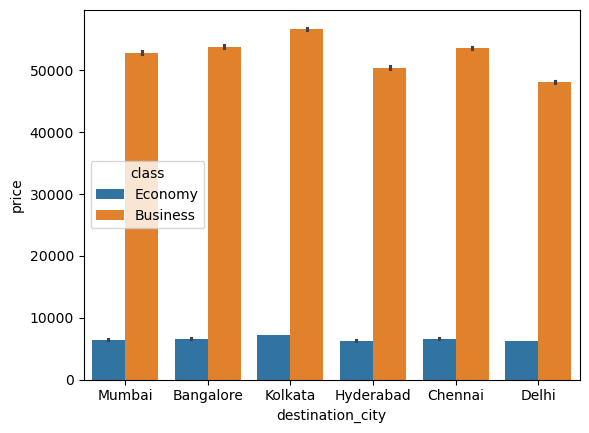

<Figure size 1500x1000 with 0 Axes>

In [34]:
sns.barplot(x='destination_city',y='price', data=data, hue='class')
plt.figure(figsize = (15,10))
plt.show()

## Kolkata have the highest Business class ticket at Distination_City followed by Mumbai and Banglore

## HOW ANALYSIS OF  STOPS  AFFECTED BY PRICE

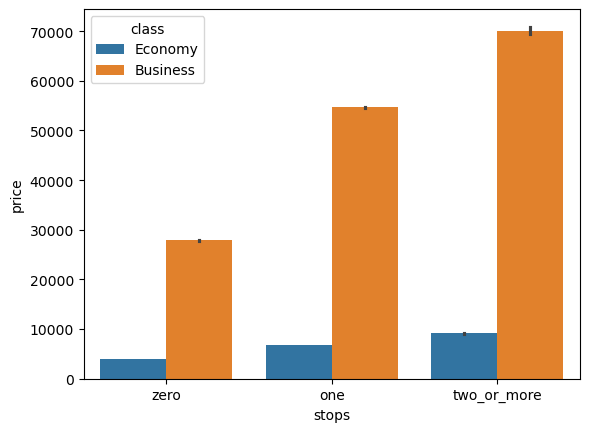

<Figure size 1500x1000 with 0 Axes>

In [37]:
sns.barplot(x='stops',y='price', data=data, hue='class')
plt.figure(figsize = (15,10))
plt.show()

## Two or More Stops costed more in Price comapred to Zero and One Stops.

## ANALYSIS PRICE IMPACT ON AIRLINES ON THE NUMBER OF STOPS MADE

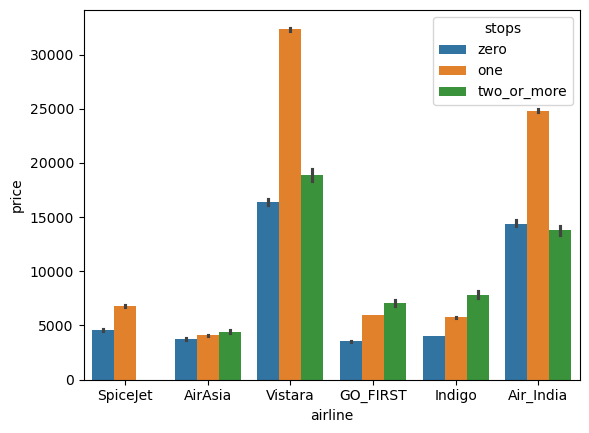

<Figure size 1500x1000 with 0 Axes>

In [40]:
sns.barplot(x='airline',y='price', data=data, hue='stops')
plt.figure(figsize = (15,10))
plt.show()

## Vistara Airline made more money with One Stop more than Zero,two or more Store compared to others.

## IMPACT OF PRICE ON DEPARTURE TIME FROM SOURCE CITY

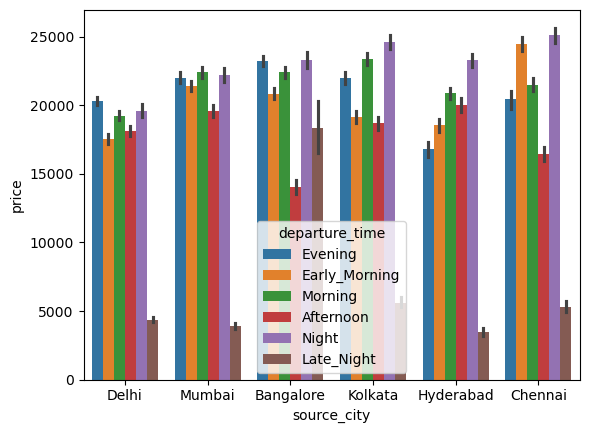

<Figure size 2500x1500 with 0 Axes>

In [43]:
sns.barplot(x='source_city',y='price', data=data, hue='departure_time')
plt.figure(figsize = (25,15))
plt.show()

### Price was highest for departure time at Night for Flight departing from Chennai and high across different Source Cities.
### Late Night departure was lowest across differnt source cities

## IMPACT OF PRICE ON ARRIVAL TIME FROM DESTINATION CITY

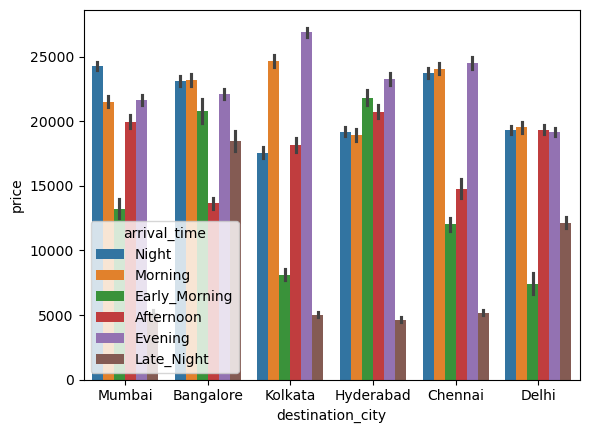

<Figure size 2500x2000 with 0 Axes>

In [46]:
sns.barplot(x='destination_city',y='price', data=data, hue='arrival_time')
plt.figure(figsize = (25,20))
plt.show()

### Price was highest for arrival time at Evening for Flight arriving in Kolkata and high across different destination Cities.


# DATA PREPROCESSING

In [49]:
data.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [50]:
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# Check for Duplicates

In [52]:
data.duplicated().sum()

2213

In [53]:
data.drop_duplicates()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
Encode=LabelEncoder()
for column in data.columns:
    if data[column].dtype=='object':
        data[column]=Encode.fit_transform(data[column])

In [56]:
data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49,69265
300149,5,1,0,0,5,3,0,10.42,49,77105
300150,5,1,1,0,5,3,0,13.83,49,79099
300151,5,1,1,0,2,3,0,10.00,49,81585


# Check for Outliers in the dataframe- If the direction is towards the right or Left

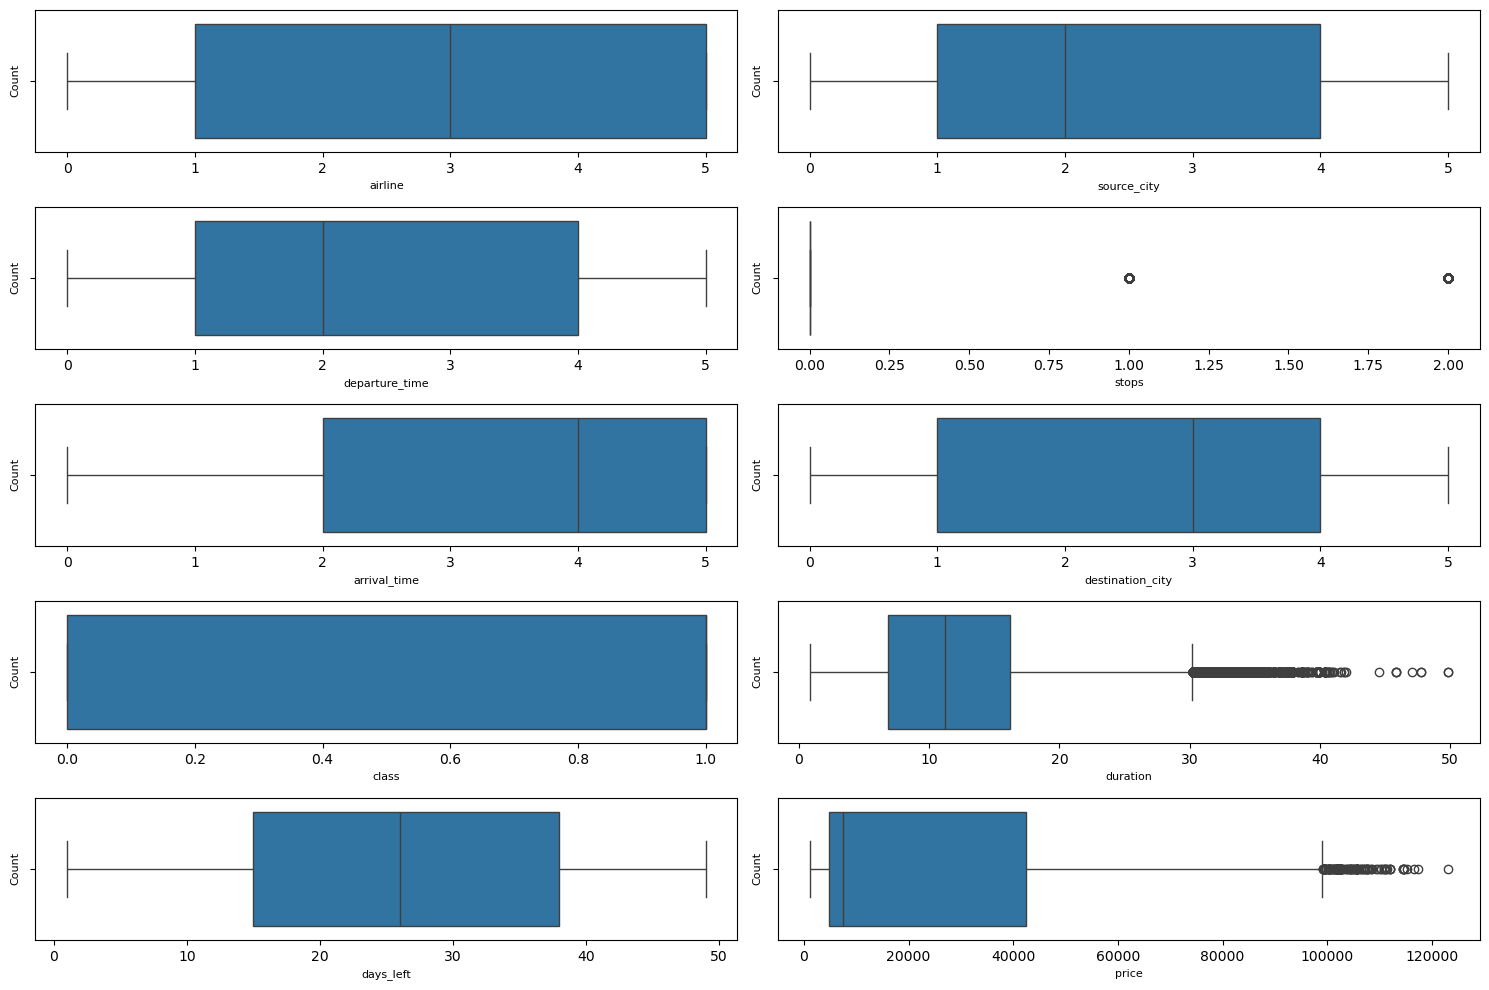

In [58]:
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=8)
        plt.ylabel('Count',fontsize=8)
    plotnumber+=1
plt.tight_layout()

# HANDLING OUTLIERS


In [ ]:
# If your data is skewed use IQR but If its a normal distribution use 3-sigma rules to check your outliers

In [60]:
# Find Q1 and Q3
Q1 = data['duration'].quantile(0.25)
print('lower quartile', Q1)
Q3= data['duration'].quantile(0.75)
print('upper quartile',Q3)

lower quartile 6.83
upper quartile 16.17


In [61]:
# Find IQR
IQR = Q3-Q1
IQR

9.340000000000002

In [62]:
# Find lower limit and upper limit
lower_limit =Q1-1.5*IQR
print('lower limit is' ,lower_limit)
upper_limit=Q3+1.5*IQR
print('Upper limit is', upper_limit)


lower limit is -7.1800000000000015
Upper limit is 30.180000000000003


In [63]:
# find values above upper limit
data.loc[data['duration']>upper_limit]

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
10534,5,2,0,1,5,0,1,31.25,4,12222
10535,5,2,0,1,5,0,1,33.17,4,12222
10540,1,2,1,1,2,0,1,36.92,4,12321
10891,5,2,0,1,5,0,1,31.25,6,12222
10892,5,2,0,1,5,0,1,33.17,6,12222
...,...,...,...,...,...,...,...,...,...,...
296064,1,1,1,0,0,4,0,30.33,5,55377
296297,1,1,1,0,0,4,0,30.33,10,55377
296391,1,1,1,0,0,4,0,30.33,12,55377
296716,1,1,1,0,0,4,0,30.33,19,55377


In [64]:
# To find the percentage of outlier
len(data.loc[data['duration']>upper_limit])/len(data)

0.00702974816177083

In [65]:
# Find values below lower limit
data.loc[data['duration']<lower_limit]

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


In [66]:
# To handle the outliers if data is not normal replace outlier with median values is used to replace
data.loc[data['duration']>upper_limit,'duration']=data['duration'].median()

In [67]:
# Find Q1 and Q3
Q1 = data['price'].quantile(0.25)
print('lower quartile', Q1)
Q3= data['price'].quantile(0.75)
print('upper quartile',Q3)

lower quartile 4783.0
upper quartile 42521.0


In [68]:
# Find IQR
IQR = Q3-Q1
IQR

37738.0

In [69]:
# Find lower limit and upper limit
lower_limit =Q1-1.5*IQR
print('lower limit is' ,lower_limit)
upper_limit=Q3+1.5*IQR
print('Upper limit is', upper_limit)


lower limit is -51824.0
Upper limit is 99128.0


In [70]:
# find values above upper limit
data.loc[data['price']>upper_limit]

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
215858,5,2,2,1,2,4,0,21.08,1,114434
215859,5,2,2,1,2,4,0,21.08,1,116562
216025,5,2,2,1,4,4,0,17.58,4,100395
216094,5,2,4,0,2,4,0,6.50,5,99129
216095,5,2,4,0,2,4,0,8.00,5,101369
...,...,...,...,...,...,...,...,...,...,...
293474,5,1,4,0,5,0,0,9.67,3,107597
296001,5,1,5,0,4,4,0,11.50,3,102832
296081,5,1,1,0,5,4,0,15.83,5,102384
296170,5,1,5,0,4,4,0,11.50,7,104624


In [71]:
# To find the percentage of outlier
len(data.loc[data['price']>upper_limit])/len(data)

0.0004097910065866408

In [72]:
# Find values below lower limit
data.loc[data['price']<lower_limit]

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


In [73]:
# To handle the outliers if data is not normal replace outlier with median values is used to replace
data.loc[data['price']>upper_limit,'price']=data['price'].median()

# SCALING DATA [ Normalization or Standardization] Using MinMax Scaler

In [75]:
# Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
df =['airline','source_city','departure_time','stops','arrival_time','destination_city','class']
data1 = scaling.fit_transform(data.drop(df,axis=1))

In [76]:
data1

array([[0.04567144, 0.        , 0.04953662],
       [0.05112474, 0.        , 0.04953662],
       [0.04567144, 0.        , 0.04956727],
       ...,
       [0.44308112, 1.        , 0.7969387 ],
       [0.3125426 , 1.        , 0.82234052],
       [0.31526926, 1.        , 0.82234052]])

In [77]:
data2=pd.DataFrame(data1,columns=['duration','days_left','price'])# the new values are passed into the columns

In [78]:
data2

,duration,days_left,price
0,0.045671,0.0,0.049537
1,0.051125,0.0,0.049537
2,0.045671,0.0,0.049567
3,0.048398,0.0,0.049557
4,0.051125,0.0,0.049557
...,...,...,...
300148,0.315269,1.0,0.696455
300149,0.326858,1.0,0.776564
300150,0.443081,1.0,0.796939
300151,0.312543,1.0,0.822341


In [79]:
df1=data[['airline','source_city','departure_time','stops','arrival_time','destination_city','class']]

In [80]:
new_data = pd.concat([df1,data2],axis=1)# we are merging the tranformed continous data with non transform discrete data

In [81]:
new_data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,0.045671,0.0,0.049537
1,4,2,1,2,4,5,1,0.051125,0.0,0.049537
2,0,2,1,2,1,5,1,0.045671,0.0,0.049567
3,5,2,4,2,0,5,1,0.048398,0.0,0.049557
4,5,2,4,2,4,5,1,0.051125,0.0,0.049557
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,0.315269,1.0,0.696455
300149,5,1,0,0,5,3,0,0.326858,1.0,0.776564
300150,5,1,1,0,5,3,0,0.443081,1.0,0.796939
300151,5,1,1,0,2,3,0,0.312543,1.0,0.822341


# FEATURE ENGINEERING

In [83]:
new_data.corr()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,1.000000,-0.028350,0.056885,-0.029838,0.037714,-0.030172,-0.178862,0.005690,-0.010678,0.242205
source_city,-0.028350,1.000000,-0.004688,0.001819,0.044153,-0.222935,0.000075,0.016025,-0.003568,0.004158
departure_time,0.056885,-0.004688,1.000000,-0.008518,-0.046282,-0.001761,-0.053340,0.095004,-0.001597,0.058100
stops,-0.029838,0.001819,-0.008518,1.000000,0.010515,-0.012846,0.100262,-0.492575,-0.007047,-0.203028
arrival_time,0.037714,0.044153,-0.046282,0.010515,1.000000,-0.037431,-0.027647,0.010267,-0.004191,0.041754
destination_city,-0.030172,-0.222935,-0.001761,-0.012846,-0.037431,1.000000,0.001603,0.001430,-0.005323,0.004736
class,-0.178862,0.000075,-0.053340,0.100262,-0.027647,0.001603,1.000000,-0.152943,0.013039,-0.937812
duration,0.005690,0.016025,0.095004,-0.492575,0.010267,0.001430,-0.152943,1.000000,-0.033722,0.214814
days_left,-0.010678,-0.003568,-0.001597,-0.007047,-0.004191,-0.005323,0.013039,-0.033722,1.000000,-0.089896
price,0.242205,0.004158,0.058100,-0.203028,0.041754,0.004736,-0.937812,0.214814,-0.089896,1.000000


#### Airline and duration has correlation with the target(price)

<Axes: >

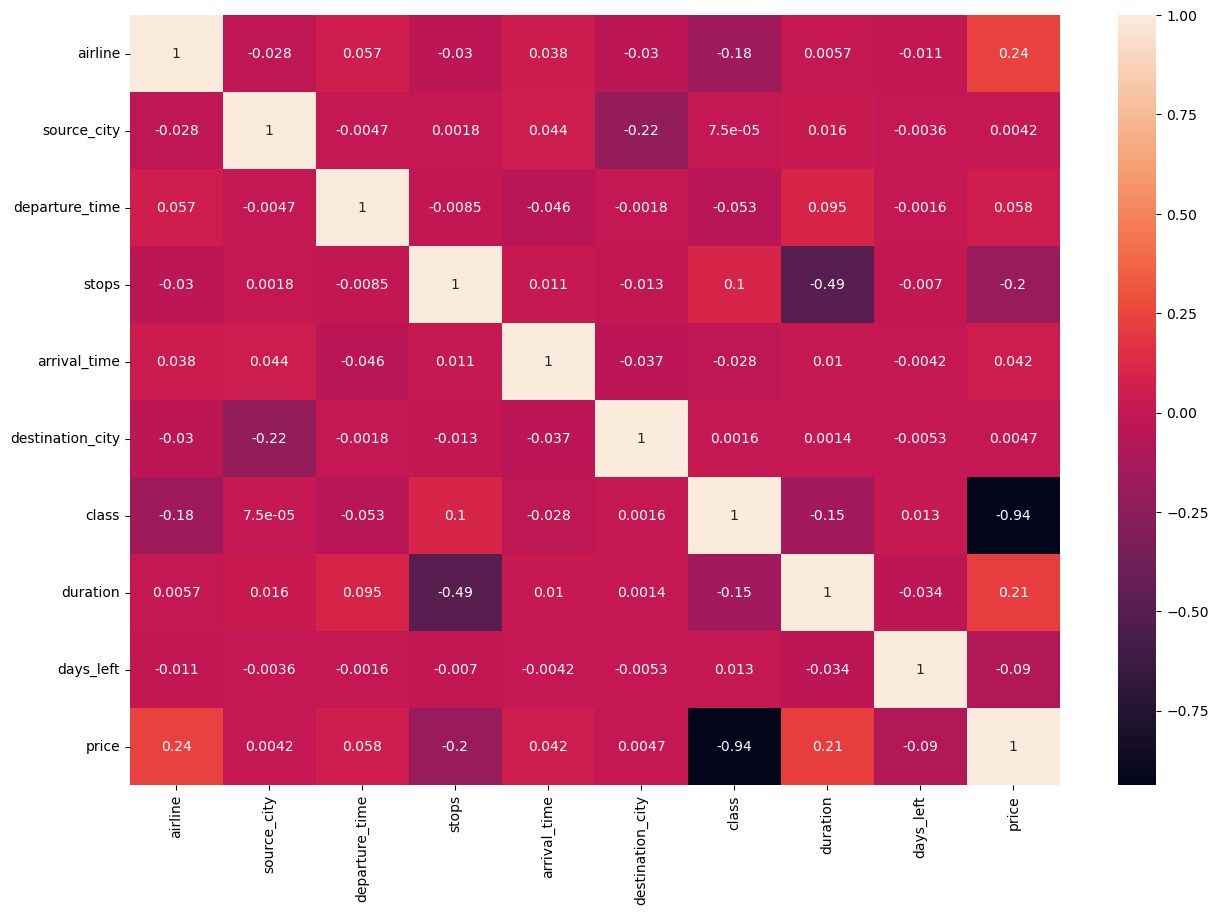

In [85]:
plt.figure(figsize=(15,10))
sns.heatmap(new_data.corr(),annot = True)

<Axes: >

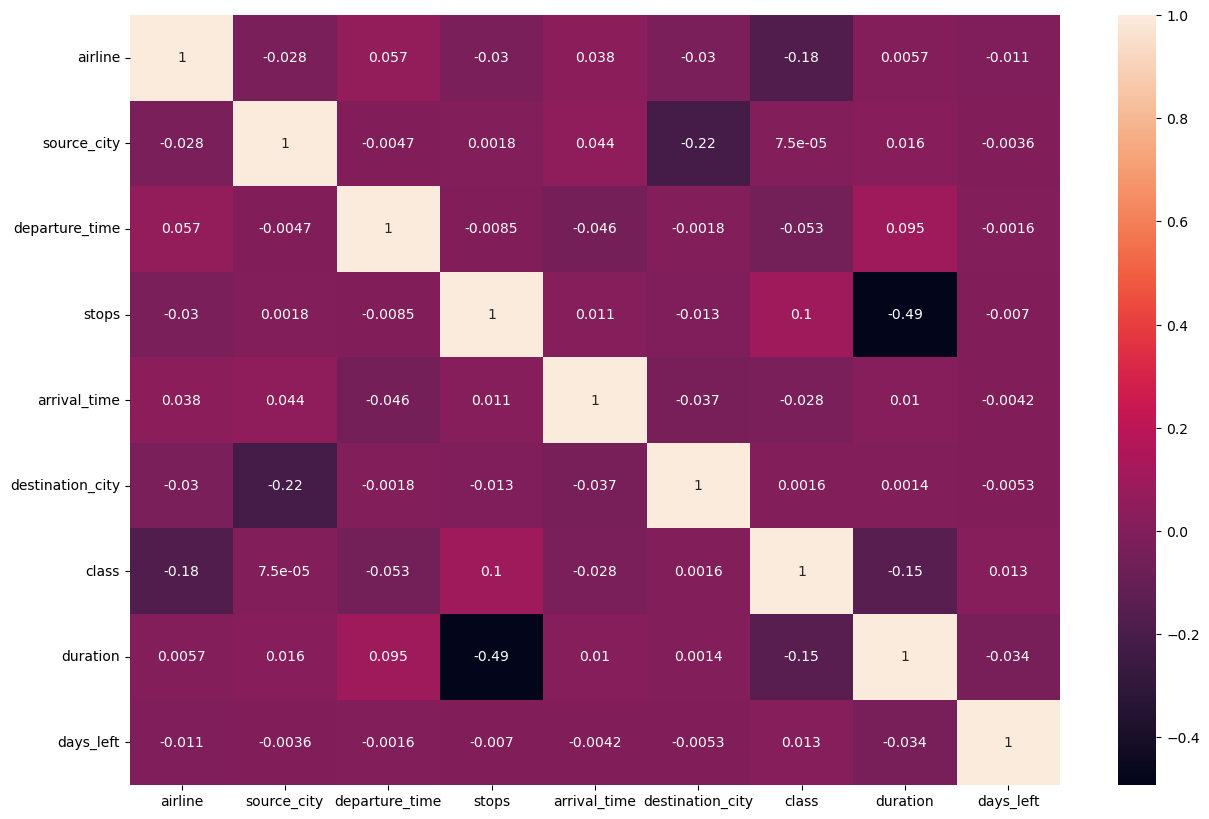

In [86]:
# Checking for Multicollinearity - There shold not be any hight correlation among input variables
plt.figure(figsize=(15,10))
sns.heatmap(new_data.drop('price',axis=1).corr(),annot=True)

### Multicollinearity satisfied - there are no major correlation amount inputs features

## NOTE: Heat Map Analysis
## Linearity
- We include columns which has high correlation with Target
- We drop columns which has less correlation with target
## Little or No  multicollinearity
- We include columns which has less correlation among each other
- we drop one of the column if two input variable has high correlation

# SPLIT DATA INTO  X AND Y

In [90]:
# storing the Dependent Variables in X and Independent Variable in Y
x=new_data.drop(['price'],axis=1)
y=new_data['price']

In [91]:
x

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,2,2,2,5,5,1,0.045671,0.0
1,4,2,1,2,4,5,1,0.051125,0.0
2,0,2,1,2,1,5,1,0.045671,0.0
3,5,2,4,2,0,5,1,0.048398,0.0
4,5,2,4,2,4,5,1,0.051125,0.0
...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,0.315269,1.0
300149,5,1,0,0,5,3,0,0.326858,1.0
300150,5,1,1,0,5,3,0,0.443081,1.0
300151,5,1,1,0,2,3,0,0.312543,1.0


In [92]:
y

0         0.049537
1         0.049537
2         0.049567
3         0.049557
4         0.049557
            ...   
300148    0.696455
300149    0.776564
300150    0.796939
300151    0.822341
300152    0.822341
Name: price, Length: 300153, dtype: float64

# SPLIT DATA FOR TRAINING AND TESTING

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [95]:
x_train.shape

(240122, 9)

In [96]:
x_test.shape

(60031, 9)

In [97]:
new_data.shape

(300153, 10)

# MODEL BUILDING

In [99]:
# Import Linear Regression Model
from sklearn.linear_model import LinearRegression
# Initialise Model
Model_LR=LinearRegression()
# Train Model with x_train and y_train
Model_LR.fit(x_train,y_train)

LinearRegression()

In [100]:
# Make Prediction  using X_Test
y_pred = Model_LR.predict(x_test)

In [101]:
y_pred # this is the predicted values

array([ 0.03554867,  0.52825603,  0.06975046, ...,  0.04899664,
       -0.0260082 ,  0.58534983])

In [102]:
y_test # this the actual values

27131     0.063975
266857    0.651149
141228    0.052009
288329    0.603421
97334     0.055923
            ...   
5234      0.040065
5591      0.019373
168314    0.057517
175191    0.040637
287693    0.667845
Name: price, Length: 60031, dtype: float64

In [103]:
# Slope/coefficient of x
Model_LR.coef_

array([ 9.52804933e-03,  1.00066604e-03,  3.69177071e-04, -3.44147515e-02,
        1.88339083e-03,  1.21873264e-03, -4.54249185e-01,  2.30243331e-02,
       -6.29522294e-02])

In [104]:
# Intercept
Model_LR.intercept_

0.5063348116874894

In [105]:
Model_LR.predict([[5,2,4,0,2,4,0,6.50,5]])

array([0.40099183])

# EVALUATE THE MODEL

In [107]:
# This is used to evaluate a classification Model.
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
#acc = accuracy_score(y_test,y_pred)
#pr = precision_score(y_test,y_pred)
#re = recall_score(y_test,y_pred)
#f1 = f1_score(y_test,y_pred)
#cm = confusion_matrix(y_test,y_pred)
#print('Accuracy Score: ',acc,'\nPrecision:', pr,'\nRecall Score:', re,'\nF1 Score', f1, '\nConfusion Matrix: \n', cm)
#print(classification_report(y_test,y_pred))
# ROC-AUC Method
# from sklearn.metrics import roc_curve,auc
#false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
#roc_auc_score=auc(false_positive_rate,true_positive_rate)
#print(roc_auc_score)

In [108]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
print('Mean Sqaure Error:',MSE,'\nMean Absolute Error:',MAE,'\nRoot Mean Sqaure Error',RMSE)

Mean Sqaure Error: 0.005154219300291703 
Mean Absolute Error: 0.0473814410582476 
Root Mean Sqaure Error 0.07179289171144802


In [109]:
r2=RMSE

In [110]:
# adjusted R2 Score
# adjusted R2 score : 1- (1-R2)(n-1)/(n-p-1)
# n is data testing points, p is no. of independent variables, or predictors, or features
# adj_r2=1-(r2)*(shape-1)/(shape of test data - number of independent variable number-1)
adj_r2 = 1-((1-r2)*(60031-1)/(60031-9-1))
adj_r2

0.07165370935902815

In [111]:
from sklearn.neighbors import KNeighborsRegressor # K-Nearest Neighbors Regressor
from sklearn.svm import SVR # Support Vector Machine (SVM) Regressor
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regressor
from sklearn.linear_model import SGDRegressor # Gradient Descent Regressor (using Stochastic Gradient Descent)
from sklearn.ensemble import RandomForestRegressor # Random Forest Regressor
from statsmodels.tsa.arima.model import ARIMA  # ARIMA model
from statsmodels.tsa.holtwinters import ExponentialSmoothing  # Holt-Winters model
from sklearn.model_selection import TimeSeriesSplit  # For time series cross-validation

# Using KNN Regressor

In [113]:
# Using KNN Regressor to evaluate our model
Model_KNN = KNeighborsRegressor()
# Train Model with x_train and y_train
Model_KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [114]:
# Make Prediction  using X_Test(Test data)
y_pred = Model_KNN.predict(x_test)

In [115]:
y_pred

array([0.06397458, 0.734646  , 0.05254682, ..., 0.07791595, 0.03987248,
       0.6926584 ])

In [116]:
y_test # this the actual values

27131     0.063975
266857    0.651149
141228    0.052009
288329    0.603421
97334     0.055923
            ...   
5234      0.040065
5591      0.019373
168314    0.057517
175191    0.040637
287693    0.667845
Name: price, Length: 60031, dtype: float64

In [117]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
print('Mean Sqaure Error:',MSE,'\nMean Absolute Error:',MAE,'\nRoot Mean Sqaure Error',RMSE)

Mean Sqaure Error: 0.0017402259218925191 
Mean Absolute Error: 0.019123686140112655 
Root Mean Sqaure Error 0.04171601517274294


# Using Decision Tree Regressor

In [211]:
# Initialize the SVR model with an RBF kernel (or choose 'linear', 'poly', etc.)
Model_DTree =  DecisionTreeRegressor(max_depth=3, random_state=42)
# Train Model with x_train and y_train
Model_DTree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [212]:
# Make Prediction  using X_Test(Test data)
y_pred = Model_DTree.predict(x_test)

In [213]:
y_pred

array([0.04467841, 0.57815346, 0.04467841, ..., 0.04467841, 0.02088251,
       0.57815346])

In [229]:
y_test # this the actual values

27131     0.063975
266857    0.651149
141228    0.052009
288329    0.603421
97334     0.055923
            ...   
5234      0.040065
5591      0.019373
168314    0.057517
175191    0.040637
287693    0.667845
Name: price, Length: 60031, dtype: float64

In [214]:
# Evaluate The Model
MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
print('Mean Sqaure Error:',MSE,'\nMean Absolute Error:',MAE,'\nRoot Mean Sqaure Error:',RMSE)

Mean Sqaure Error: 0.0035712292958905633 
Mean Absolute Error: 0.03579371625948556 
Root Mean Sqaure Error: 0.05975976318469279


# Using Random Forest Regressor

In [216]:
Model_RF = RandomForestRegressor()
# Train Model with x_train and y_train
Model_RF.fit(x_train,y_train)

RandomForestRegressor()

In [217]:
# Make Prediction  using X_Test(Test data)
y_pred = Model_RF.predict(x_test)

In [218]:
y_pred

array([0.05516303, 0.66654133, 0.05200936, ..., 0.05581125, 0.02862701,
       0.67807392])

In [231]:
y_test # this the actual values

27131     0.063975
266857    0.651149
141228    0.052009
288329    0.603421
97334     0.055923
            ...   
5234      0.040065
5591      0.019373
168314    0.057517
175191    0.040637
287693    0.667845
Name: price, Length: 60031, dtype: float64

In [219]:
# Evaluate The Model
MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
print('Mean Sqaure Error:',MSE,'\nMean Absolute Error:',MAE,'\nRoot Mean Sqaure Error:',RMSE)

Mean Sqaure Error: 0.0011002871796108803 
Mean Absolute Error: 0.011592402784328753 
Root Mean Sqaure Error: 0.03317057701655008


# Using Support Vector Machine

In [235]:
Model_SVR = SVR(kernel='rbf', C=1.0, epsilon=0.1)
# Train Model with x_train and y_train
Model_SVR.fit(x_train,y_train)

SVR()

In [236]:
# Make Prediction  using X_Test(Test data)
y_pred = Model_SVR.predict(x_test)

In [237]:
y_pred

array([0.07498107, 0.65521265, 0.07104354, ..., 0.07270176, 0.00234308,
       0.5059076 ])

In [238]:
y_test # this the actual values

27131     0.063975
266857    0.651149
141228    0.052009
288329    0.603421
97334     0.055923
            ...   
5234      0.040065
5591      0.019373
168314    0.057517
175191    0.040637
287693    0.667845
Name: price, Length: 60031, dtype: float64

In [239]:
# Evaluate The Model
MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
print('Mean Sqaure Error:',MSE,'\nMean Absolute Error:',MAE,'\nRoot Mean Sqaure Error:',RMSE)

Mean Sqaure Error: 0.0037193529881423787 
Mean Absolute Error: 0.04681437782735323 
Root Mean Sqaure Error: 0.06098649840860171


# Hyperparameter Tuning Using GridSearchCV

In [ ]:
# Grid search
from sklearn.model_selection import GridSearchCV
# Define parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1]
}
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

In [ ]:
# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best R-squared:", grid_search.best_score_)